<a href="https://colab.research.google.com/github/AlejandroGuedez/Equipo-23-de-Diplomado-data-scientist/blob/main/TP_Parte_1_Gr23_v_2022_04_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1 - Grupo 23

**Integrantes:** Franco Amilcar Genolet (francogeno97@gmail.com), Fabian Alejandro Zapata Cerutti (fzc501@gmail.com), Luis Alejandro Guedez Gomez (luis.guedez@dicsys.com), María Laura Mantovani (mantovanimlaura@gmail.com).

# Ejercicio 1 - Análisis descriptivo - Consigna

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

# Resolución

In [2]:
#Importamos las librerías que necesitamos para trabajar
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
seaborn.set_context('talk')
pd.options.display.float_format = '{:,.1f}'.format

In [3]:
#Lectura del dataset
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

Para responder a la pregunta de cuáles son las variables de interés, comenzamos revisando las columnas de nuestro dataset. Vemos la cantidad de nulos, de ceros y de datos únicos para cada variable:

In [4]:
def status(data):

    data2=data 

    # total de rows
    tot_rows=len(data2)
    
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    
    # percentage of nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    
    # num of zeros
    d2['q_zeros']=(data2==0).sum().values

    # perc of zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows

    # total unique values
    d2['unique']=data2.nunique().values
    
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    
    return(d2)

In [5]:
pd.options.display.float_format = '{:,.1f}'.format
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,profile_gender,0,0.0,0,0.0,3,object
1,profile_age,0,0.0,0,0.0,50,int64
2,work_country,0,0.0,0,0.0,1,object
3,work_province,0,0.0,0,0.0,25,object
4,profile_years_experience,0,0.0,318,0.1,59,float64
5,work_years_in_company,0,0.0,1538,0.3,45,float64
6,work_years_in_current_position,0,0.0,1324,0.2,43,float64
7,work_people_in_charge_of,0,0.0,4592,0.8,51,int64
8,profile_studies_level,0,0.0,0,0.0,7,object
9,profile_studies_level_state,0,0.0,0,0.0,3,object


Luego de esta exploración de las columnas del dataset, sabemos que nuestras columnas o variables de interés para responder a la pregunta son: 
1. Lenguajes de programación: `tools_programming_languages`, y 
2. Salario (Bruto o Neto): `salary_monthly_BRUTO` y `salary_monthly_NETO`
En la tabla anterior vimos que el salario Neto tiene 212 valores nulos, con lo cual parece mejor opción para el análisis considerar el salario Bruto por ser mas completo.

In [6]:
#armamos un dataset con nuestras columnas relevantes
relevant_columns = ['tools_programming_languages', 'salary_monthly_BRUTO']

Antes de trabajar en la columna `tools_programming_languages`, veamos cómo se distribuye la variable `salary_monthly_BRUTO`. A continuación se muestran algunas medidas de tendencia central.

In [246]:
df[['salary_monthly_BRUTO']].describe().round()

,salary_monthly_BRUTO
count,"6,095"
mean,"124,059"
std,"122,912"
min,1
25%,"61,595"
50%,"96,000"
75%,"145,000"
max,"2,180,000"


Comenzamos a notar que el sueldo mínimo es de $1, dato que consideramos equivalente a un "Ns/Nc". Además, el sueldo máximo es 17 veces la media. Veamos un histograma de frecuencias del Salario Bruto: 

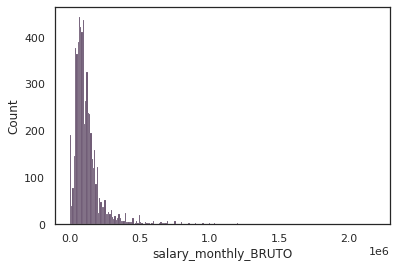

In [245]:
seaborn.set_theme(style="white", palette="rocket")
x = df['salary_monthly_BRUTO']
ax = seaborn.histplot(x) #

Como ya se notaba en la tabla, en el gráfico observamos una fuerte presencia de valores outliers que están distorsionando los resultados. Nos encontramos ante la pregunta de si eliminar o no dichos valores. 

El siguiente código remueve las filas de datos para las cuales la diferencia absoluta entre el salario BRUTO y la media es menor o igual que 2.5 veces el desvío estándar del salario. Nótese que remueve tanto los valores muy altos y como los muy bajos.

In [247]:
def clean_outliers_sd(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <=
        (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

In [248]:
df_filtered = clean_outliers_sd(df,'salary_monthly_BRUTO')

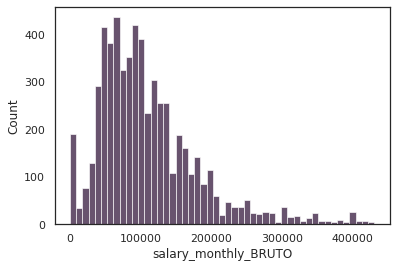

In [249]:
seaborn.set_theme(style="white", palette="rocket")
d = df_filtered['salary_monthly_BRUTO']
ad = seaborn.histplot(d) #

Luego de aplicar el filtro mencionado, el gráfico mejoró un poco en relación a los outliers que se encuentran por la derecha. Sin embargo, todavía no hemos solucionado el problema de los valores muy pequeños. Esto se debe a que el desvío estándar del Salario Bruto es muy grande y la cuenta no llega a filtrar los valores pequeños.

A continuación volvemos a ver las medidas de tendencia central:

In [250]:
df_filtered[['salary_monthly_BRUTO']].describe().round()

,salary_monthly_BRUTO
count,"5,946"
mean,"110,156"
std,"72,303"
min,1
25%,"60,240"
50%,"95,000"
75%,"140,000"
max,"431,000"


Vemos que el máximo se redujo de \$2 millones a \$431 mil, pero los valores "$1" siguen en la base filtrada. Para solucionar esto, analicemos los percentiles de nuestra distribución.

In [304]:
salary_col='salary_monthly_BRUTO'
k = 97.55497212
percentile_x = df[salary_col].quantile(k / 100)
n_below = len(df[df[salary_col] < percentile_x])
n_above = len(df[df[salary_col] > percentile_x])
print('Percentil {} de la columna {}: {}'.format(k, salary_col, percentile_x))
print('% de datos menor que percentil {}: {}'.format(k, n_below / len(df)))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(df)))

Percentil 97.55497212 de la columna salary_monthly_BRUTO: 431000.00645319914
% de datos menor que percentil 97.55497212: 0.9755537325676784
% de datos mayor que percentil 97.55497212: 0.024446267432321575


Aquí podemos observar que con el filtro anterior solo quitamos el 2.4% de nuestros datos. Para remover los valores pequeños, veamos percentiles pequeños de la variable:

In [313]:
k = 3.5
percentile_x = df[salary_col].quantile(k / 100)
n_below = len(df[df[salary_col] < percentile_x])
n_above = len(df[df[salary_col] > percentile_x])
print('Percentil {} de la columna {}: {}'.format(k, salary_col, percentile_x))
print('% de datos menor que percentil {}: {}'.format(k, n_below / len(df)))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(df)))

Percentil 3.5 de la columna salary_monthly_BRUTO: 14645.000000000011
% de datos menor que percentil 3.5: 0.035110746513535684
% de datos mayor que percentil 3.5: 0.9648892534864643


Con esto comprobamos que si removemos los sueldos menores a \$14.645 estaríamos trabajando con el 96.5% de los datos. Tomamos la base filtrada y removemos los valores menores a dicho valor:

In [322]:
df_filtered_new = df_filtered[df_filtered['salary_monthly_BRUTO'] > 14645]

Revisamos ahora las medidas de tendencia central resultantes:

In [325]:
df_filtered_new[['salary_monthly_BRUTO']].describe().round()

,salary_monthly_BRUTO
count,"5,732"
mean,"114,205"
std,"70,476"
min,"15,000"
25%,"65,000"
50%,"98,000"
75%,"142,000"
max,"431,000"


Podemos ver que la cuenta de datos bajó a 5,732, y que el mínimo es ahora \$15.000, que parece un salario más realista para 2020 (el Salario Mínimo Vital y Móvil para el 2020 estaba próximo a los \$17 mil pesos). A su vez, estamos trabajando con el 94% de la muestra, con lo cual entendemos que nuestros datos siguen siendo representativos.

In [327]:
# acá renombramos la base
df = df_filtered_new

En cuanto a la columna que contiene información sobre los lenguajes de programación utilizados (`tools_programming_languages`), sabemos que sus valores son strings con los lenguajes seleccionados separados por comas. Necesitamos separarlos para poder hacer un análisis comparativo entre lenguajes.



In [328]:
#Vemos las primeras 3 filas a modo de ejemplo
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen. Además, crea un nuevo dataset llamado `df_lang` en el que agrega a nuestro dataset `relevant_columns` recientemente creado dos columnas nuevas: una llamada `cured_programming_languages` y otra (creada a partir de esta última) llamada `programming_language`. 

In [329]:
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')\
    .replace('-', '')\
    .replace('ninguno', '')
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Vemos cómo quedó este nuevo dataset `df_lang` revisando sus primeras 5 filas.

---



In [330]:
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_BRUTO,cured_programming_languages
1,html,"HTML, Javascript, Python","79,000","[html, javascript, python]"
1,javascript,"HTML, Javascript, Python","79,000","[html, javascript, python]"
1,python,"HTML, Javascript, Python","79,000","[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","130,000","[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","130,000","[bash/shell, c, css, html, java, javascript, p..."


Se observa que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

A continuación revisamos la cantidad de veces que se repite cada lenguaje en nuestro dataframe `df_lang` para empezar a aproximarnos a los lenguajes de programación más frecuentemente manejados por los encuestados. Vemos los 15 lenguajes más frecuentes entre los encuestados:

In [331]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:15]

,language,frequency
0,javascript,2359
1,sql,2042
2,html,1751
3,python,1393
4,java,1380
5,css,1176
6,bash/shell,935
7,php,842
8,.net,778
9,typescript,724


Podemos ver estos datos en un gráfico de barras: 

Text(0.5, 1.0, 'Lenguajes de programación o tecnologías que manejan')

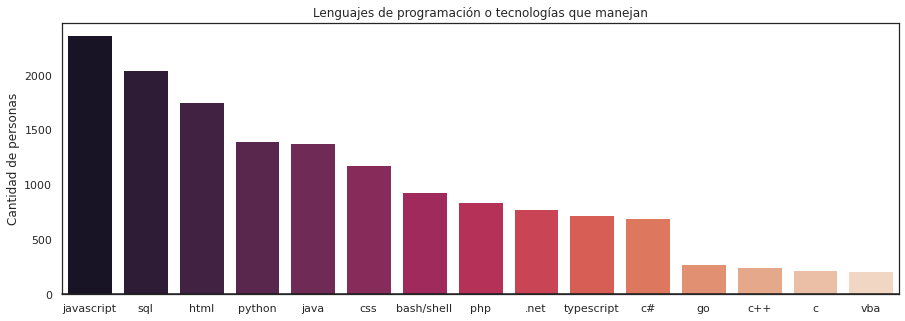

In [332]:
seaborn.set_theme(style="white")
aux = language_count[:15]
filtered_language_count = aux.sort_values(by='frequency',ascending=False,inplace=False)

x = numpy.array(list(filtered_language_count['language']))
y1 = numpy.array(list(filtered_language_count['frequency']))
f, (ax1) = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

seaborn.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Cantidad de personas")
ax1.set_title("Lenguajes de programación o tecnologías que manejan")

En el gráfico se ve una caída fuerte en la frecuencia de encuestados a partir del lenguaje `go`. En la tabla anterior podemos ver que 734 de los encuestados dijeron programar en `c#`, representando el 12% del total de encuestados (6095) mientras que la cantidad de encuestados que programa en `go` solo representa el 5% de la muestra. Por esto decidimos cortar nuestro listado de programas relevantes en los 11 primeros.

In [333]:
#Redefinimos los lenguajes más frecuentes para que sean 11
aux1 = language_count[:11]
filtered_language_count = aux1.sort_values(by='frequency',ascending=False,inplace=False)
x = numpy.array(list(filtered_language_count['language']))

Filtramos entonces las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages` que contiene los 11 lenguajes seleccionados y creamos un nuevo dataset a partir de `df_lang` llamado `filtered_df_lang`.

In [334]:
#Creamos nuestro dataset filtrado y vemos las primeras 5 filas
interesting_languages = x
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_BRUTO,cured_programming_languages
1,html,"HTML, Javascript, Python","79,000","[html, javascript, python]"
1,javascript,"HTML, Javascript, Python","79,000","[html, javascript, python]"
1,python,"HTML, Javascript, Python","79,000","[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","130,000","[bash/shell, c, css, html, java, javascript, p..."
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","130,000","[bash/shell, c, css, html, java, javascript, p..."


Ahora veamos medidas de tendencia central y de dispersión de la variable de interés `salary_monthly_BRUTO` con respecto a estos 11 lenguajes de programación.

In [335]:
pd.options.display.float_format = '{:,.0f}'.format
filtered_df_lang.groupby('programming_language').describe().round()

salary_monthly_BRUTO                               \
                                    count    mean    std    min    25%   
programming_language                                                     
.net                                  778 112,207 67,914 16,000 65,955   
bash/shell                            935 127,108 71,933 17,000 74,500   
c#                                    695 110,508 67,988 16,000 65,000   
css                                 1,176 108,509 71,127 16,000 60,365   
html                                1,751 108,718 71,118 16,000 61,520   
java                                1,380 127,124 72,449 15,000 72,362   
javascript                          2,359 118,059 75,986 16,000 65,000   
php                                   842 110,895 74,313 17,000 60,000   
python                              1,393 130,454 76,498 17,000 76,000   
sql                                 2,042 111,985 68,598 15,000 64,650   
typescript                            724 125,028 76,000 17,000 70,000   

                                              
                         50%     75%     max  
programming_language                          
.net                  96,000 140,000 415,000  
bash/shell           114,311 160,000 420,000  
c#                    93,000 135,000 400,000  
css                   90,000 135,000 431,000  
html                  90,000 133,000 431,000  
java                 112,000 163,074 431,000  
javascript           100,000 147,000 430,000  
php                   91,350 140,000 430,000  
python               112,000 161,000 425,000  
sql                   96,000 140,000 431,000  
typescript           108,000 155,000 425,000

En la tabla vemos que el Salario mensual Bruto mínimo para estos 11 lenguajes es de $1. Asumimos que estos datos son equivalentes a "Ns/Nc". Asimismo, para la mayoría de estos lenguajes el sueldo máximo supera los 2 millones, lo cual resulta muy diferente de la Media.

A continuación y tal como se observó en la tabla antes expuesta, el boxplot nos muestra una fuerte presencia de valores extremos máximos.

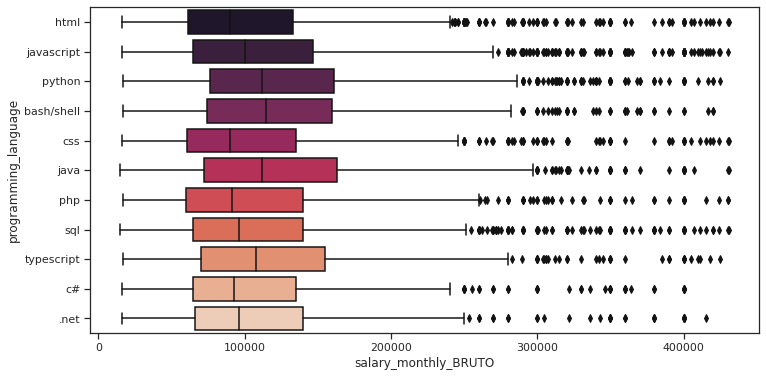

In [336]:
seaborn.set_theme(style="ticks")
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=filtered_df_lang, x="salary_monthly_BRUTO", y="programming_language",
                palette="rocket")
plt.ticklabel_format(style='plain', axis='x')

A continuación vemos graficada la mediana como medida más robusta y menos influenciable por estos datos extremos. 

In [337]:
language_medians = filtered_df_lang.groupby('programming_language').median()\
    .reset_index()\
    .rename(columns={'programming_language': 'language', 'salary_monthly_BRUTO': 'median'})

Text(0.5, 1.0, 'Mediana de Salario Mensual BRUTO para los lenguajes de programación o tecnologías más frecuentes')

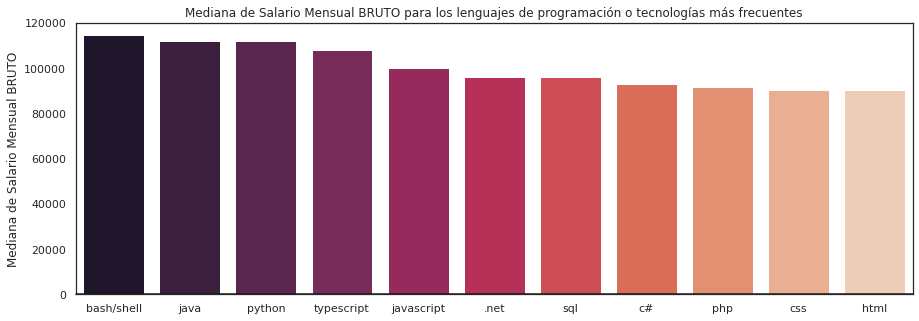

In [338]:
plot_order=language_medians.groupby('language')['median'].sum().sort_values(ascending=False).index.values

seaborn.set_theme(style="white")
x = numpy.array(list(language_medians['language']))
y = numpy.array(list(language_medians['median']))
ord = plot_order
f, (ax1) = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

seaborn.barplot(x=x, y=y, palette="rocket", ax=ax1, order = ord)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Mediana de Salario Mensual BRUTO")
ax1.set_title("Mediana de Salario Mensual BRUTO para los lenguajes de programación o tecnologías más frecuentes")

En la gráfica se observa que los lenguajes `phyton`, `java` y `bash/shell` son los mejor remunerados. Por el contrario, la mediana del Salario Mensual BRUTO es menor para `html`, `css` y `php`.

Pero ¿qué pasa si en esa selección de los lenguajes mas populares estamos dejando de lado subgrupos mas pequeños de encuestados que programan en un lenguaje poco común y que justamente por su escasez son mejor remunerados? Para analizar el total de los sueldos brutos por lenguaje, sin tener en cuenta qué tan populares son, creamos una tabla completa con las medianas por lenguaje, luego ordenamos la misma de mayor a menor, filtramos los mejores 15 analizamos estos datos. Además agregamos la frecuencia para entender la importancia de dichos lenguajes. 

In [339]:
language_medians_complete = df_lang.groupby('programming_language').median()\
    .reset_index()\
    .rename(columns={'programming_language': 'language', 'salary_monthly_BRUTO': 'median'})

In [346]:
sorted_by_median = language_medians_complete.sort_values(ascending=False,by='median').reset_index()
top15=sorted_by_median[:15]
ord = numpy.array(list(top15['language']))

In [347]:
language_count_medians = language_count[language_count.language.isin(ord)]

In [348]:
summary=top15.set_index('language').join(language_count_medians.set_index('language'),lsuffix=1).reset_index()
summary=summary.drop(summary.columns[[1]], axis=1)
summary

,language,median,frequency
0,powercli,"350,000",1
1,nim,"331,000",1
2,react,"300,000",1
3,hacklang,"264,000",1
4,rust,"262,000",15
5,rexx,"240,000",1
6,mongodb,"235,000",1
7,verilog,"216,000",1
8,cliente,"215,000",1
9,plataforma,"215,000",1


Aún habiendo quitado los valores extremos, esta tabla muestra que los salarios más altos tienen escasos representantes en cada lenguaje. Es complicado hacer un análisis cuando sólo 1 persona brindó información.

# acá falta cerrar

In [352]:
#filtered_df_lang.reset_index(inplace=True)
# dfl=df.groupby(filtered_df_lang['programming_language'])[['salary_monthly_BRUTO']].sum() ##sacar medio del salario
# dfl

In [351]:
# language_median_salary = dfl.groupby('programming_language').median()\
#     .reset_index()\
#     .rename(columns={'programming_language': 'language', 'salary_monthly_BRUTO': 'median'})
# language_median_salary

In [350]:
# dfl_order = language_median_salary.groupby('language')['median'].sum().sort_values(ascending=False).index.values
# dfl_order
# seaborn.set_theme(style="white")
# x = numpy.array(list(language_median_salary['language']))
# y = numpy.array(list(language_median_salary['median']))
# ord = dfl_order
# f, (ax1) = plt.subplots(1, 1, figsize=(15,5), sharex=True)

# seaborn.barplot(x=x, y=y, palette="rocket", ax=ax1, order = ord)
# ax1.axhline(0, color="k", clip_on=False)
# ax1.set_ylabel("Mediana de Salario Mensual BRUTO")
# ax1.set_title("Mediana de Salario Mensual BRUTO para los lenguajes de programación o tecnologías más frecuentes")

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
